<a href="https://colab.research.google.com/github/christiantommasi/MeuPortf-lioEmPythonER/blob/main/energia_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objetivos com o projeto de consumo de Energia

1. Após conclusão do projeto, vou criar duas variáveis que armazenam os valores de data e previsão (que se refere à previsão de consumo de energia) para armazenar os dados e plotar visualmente para comparação.

2. Com esse projeto, pretendo adiquir futuros dados de consumo de energia, levando assim, à um cálculo de quanto será consumido em Wh por um período X de dias, semanas ou meses, podendo se preparar e planejar qual seria o consumo em energia e o gasto que isso traria ao bolso.

3. É um projeto didático, fictício que extrai do kaggle, para aprendizado e aperfeiçoamento das habilidades, futuramente, pretendo ingressar em projetos reais nas competições que encontrei no site.

4. Em breve, após conclusão de mais 3 ou 4 projetos como esse de estudo, pretendo introduzir projetos reais que realmente agregam valor ao mundo real, como predição de preços de imóveis, vendas em ecommerce, projetos de investimentos, etc.

Importação das bibliotecas necessárias

In [ ]:
if(!require(repr)) install.packages("repr")
library(repr)
if(!require(MASS)) install.packages("MASS")
library(MASS)
if(!require(nortest)) install.packages("nortest")
library(nortest)
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

In [2]:
#Definindo o tamanho do gráfico para exibição de 15x6
options(repr.plot.width=15, repr.plot.height=8.5)

Importação do arquivo csv

In [ ]:
dados = read.csv("energy.csv", sep=",", header=T)

Renomeando as colunas para melhor interpretação
#Explicação dos nomes das colunas:
1. Data: Dias e horários que os dados foram coletados
2. Usada: Energia usada em Wh
3. Luzes: Energia usada nos cômodos da casa em Wh
4. TempCoz: Temperatura da cozinha
5. UmiCoz: Umidade da cozinha
6. TempSala: Temperatura da sala
7. UmiSala: Umidade da Sala
8. TempLava: Temperatura da lavanderia
9. UmiLava: Umidade da lavanderia
10. TempEsc: Temperatura do escritório
11. UmiEsc: Umidade do escritório
12. TempBan: Temperatura do banheiro
13. UmiBan: Umidade do banheiro
14. TempImoLN: Temperatura externa do imóvel lado norte
15. UmiImoLN: Umidade externa do imóvel lado norte
16. TempPasRou: Temperatura do ambiente de passar roupa
17. UmiPasRou: Umidade do ambiente de passar roupa
18. TempQua1: Temperatura quarto 1
19. UmiQua2: Umidade quarto 1
20. TempQua2: Temperatura quarto 2
21. UmiQua2: Umidade quarto 2
22. TempExt: Temperatura externa
23. Pressao: Pressão atmosférica
24. UmiExt: Umidade externa
25. VenVelo: Vento velocidade
26. Visibilidade: Visibilidade (da estação meteorológica de Chièvres)
27. PontoOrvalho: Ponto de Orvalho
28. Aleatoria 1
29. Aleatoria 2

In [ ]:
colnames(dados) = c("X","Data","Usada","Luzes","TempCoz","UmiCoz","TempSala","UmiSala","TempLava","UmiLava",
                    "TempEsc","UmiEsc","TempBan","UmiBan","TempImoLN","UmiImoLN","TempPasRou","UmiPasRou",
                    "TempQua1","UmiQua1","TempQua2","UmiQua2","TempExt","Pressao","UmiExt","VenVelo","Visibilidade",
                    "PontoOrvalho","Aleatoria1","Aleatoria2")

dados$X = NULL

head(dados)

In [48]:
#Reescrevendo um novo arquivo CSV
#write.table(dados, file="energy1.csv", sep=",", fileEncoding="UTF-8")

Verificando presença de valores NAs

In [ ]:
#Verificando qualquer NAs
anyNA(dados)

Fazendo o tratamento das colunas para análise dos dados, foram encontrados alguns valores inconsistentes para o modelo de machine learning

In [ ]:
"
#Verificando a presença de valores 0 (zero) no data frame
colunascomzero = sapply(dados, function(col) any(col == 0))
colunascomzero

#Retornando o nome das colunas com zero
colunanomescomzero = names(colunascomzero[colunascomzero])
colunanomescomzero"

À partir daqui começo o tratamento de outliers, coluna por coluna, após o tratamento dos outliers, inicio o processo de normalização dos dados ou o mais próximo possível de uma normalização de dados para o cálculo de machine learning:


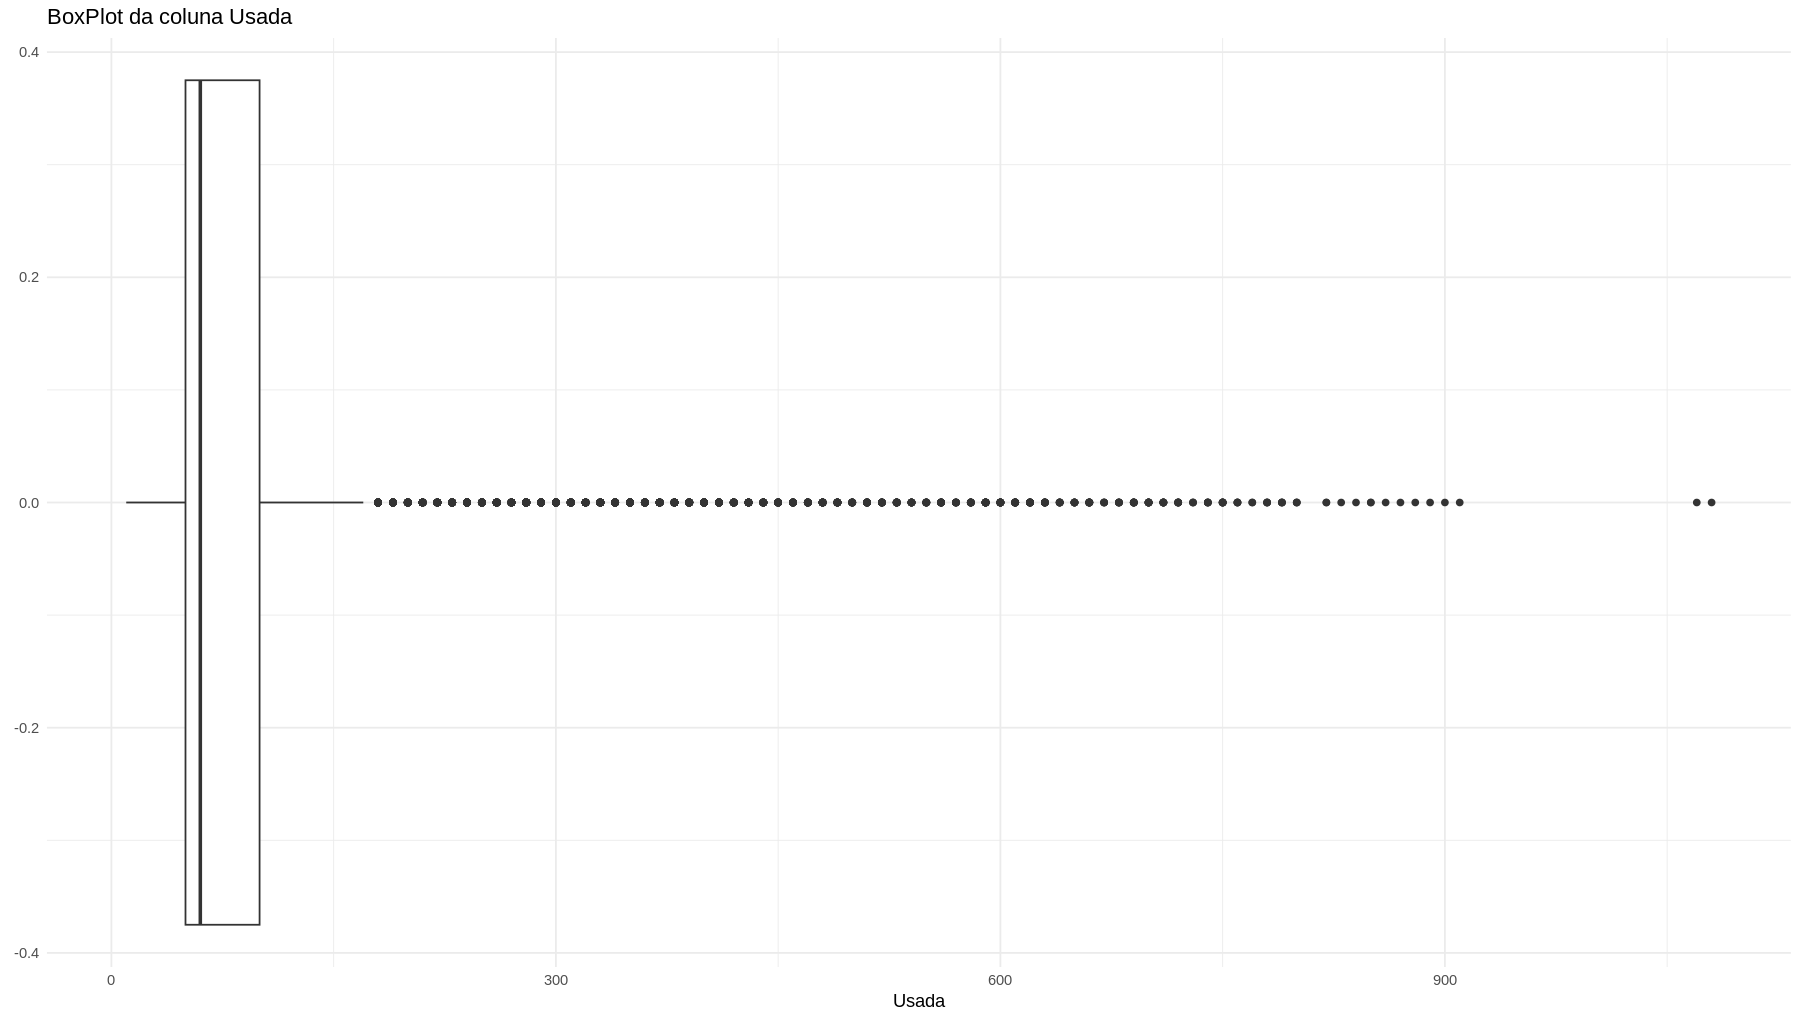

In [29]:
#Verificando outliers na coluna Usada
boxusada = ggplot(dados, aes(y=Usada)) + geom_boxplot() + coord_flip() + labs(title="BoxPlot da coluna Usada") + theme_minimal()
boxusada

In [ ]:
summary(as.factor(dados$Usada))

Removendo os picos de Outliers

In [ ]:
#Removendo os picos de outliers com IQR
q1 = quantile(dados$Usada, 0.25) #Quartil 1
q3 = quantile(dados$Usada, 0.75) #Quartil 3
iqr = q3 - q1

#Criando uma variável que armazena os valores de outliers
outliers = dados$Usada[dados$Usada < q1 | dados$Usada > q3]

#Removendo outliers com limite IQR
limite_inferior_usada = q1 - 1.5 * iqr
limite_superior_usada = q3 + 1.5 * iqr

#Armazenando os dados em uma variável sem outliers
dados_usada_sem_outliers = dados$Usada[dados$Usada >= limite_inferior_usada & dados$Usada <= limite_superior_usada]
#length(dados_usada_sem_outliers)
"Foram criados 17597 dados contra 19735 dados do data frame"

#Criando a variável que armazena a mediana de Usada sem outliers
mediana_usada_sem_outliers = median(dados_usada_sem_outliers)
#mediana_usada_sem_outliers
"Retornou a mediana de 60"

Criando um data frame

In [ ]:
#Criando um data frame
df = dados

#Substituindo os valores dos limites por NA
df$Usada = ifelse (dados$Usada >= limite_inferior_usada & dados$Usada <= limite_superior_usada, dados$Usada, NA)

#Preenchendo os valores de NAs na coluna Usada
df$Usada[is.na(df$Usada)] = mediana_usada_sem_outliers

#Verificando o resultado
summary(df$Usada)

In [ ]:
summary(as.factor(df$Usada))

Plotando um gráfico de histograma, dispersão com linha de regressão e box plot

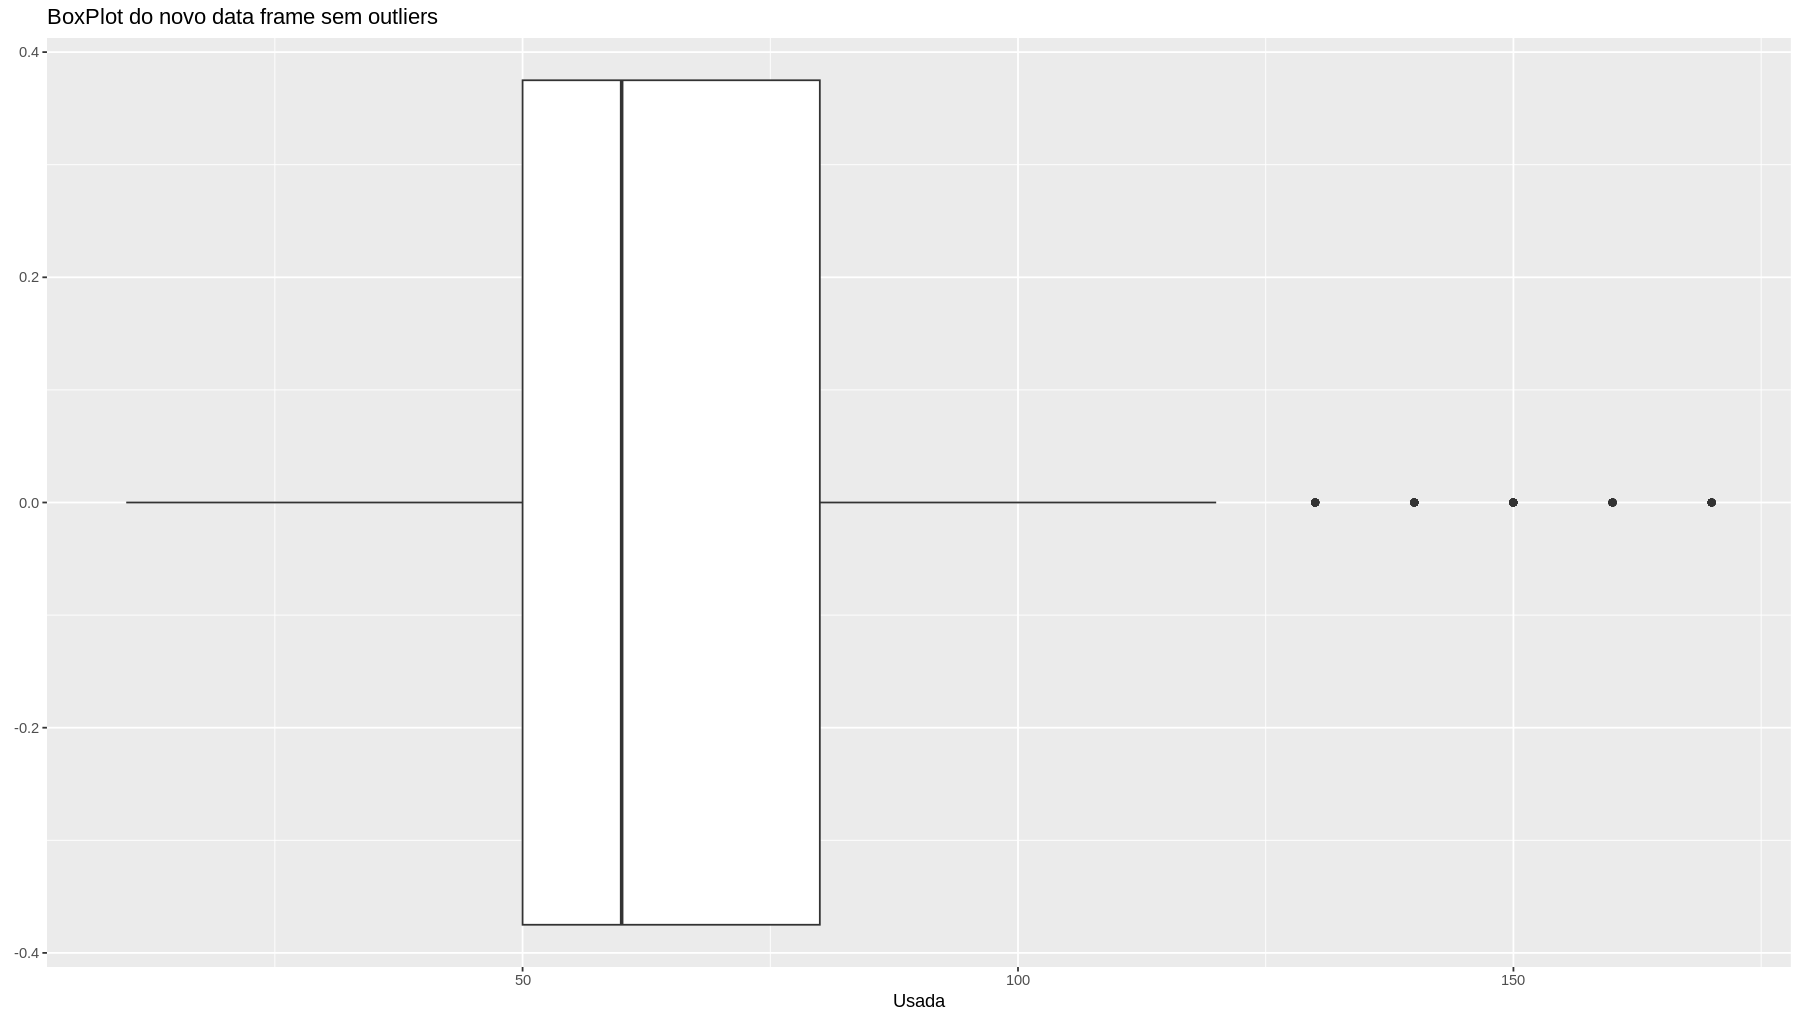

In [32]:
usadabox = ggplot(df, aes(y=Usada))
usadabox + geom_boxplot() + coord_flip() + labs(title="BoxPlot do novo data frame sem outliers")

Verificando a distribuição dos dados com histograma


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


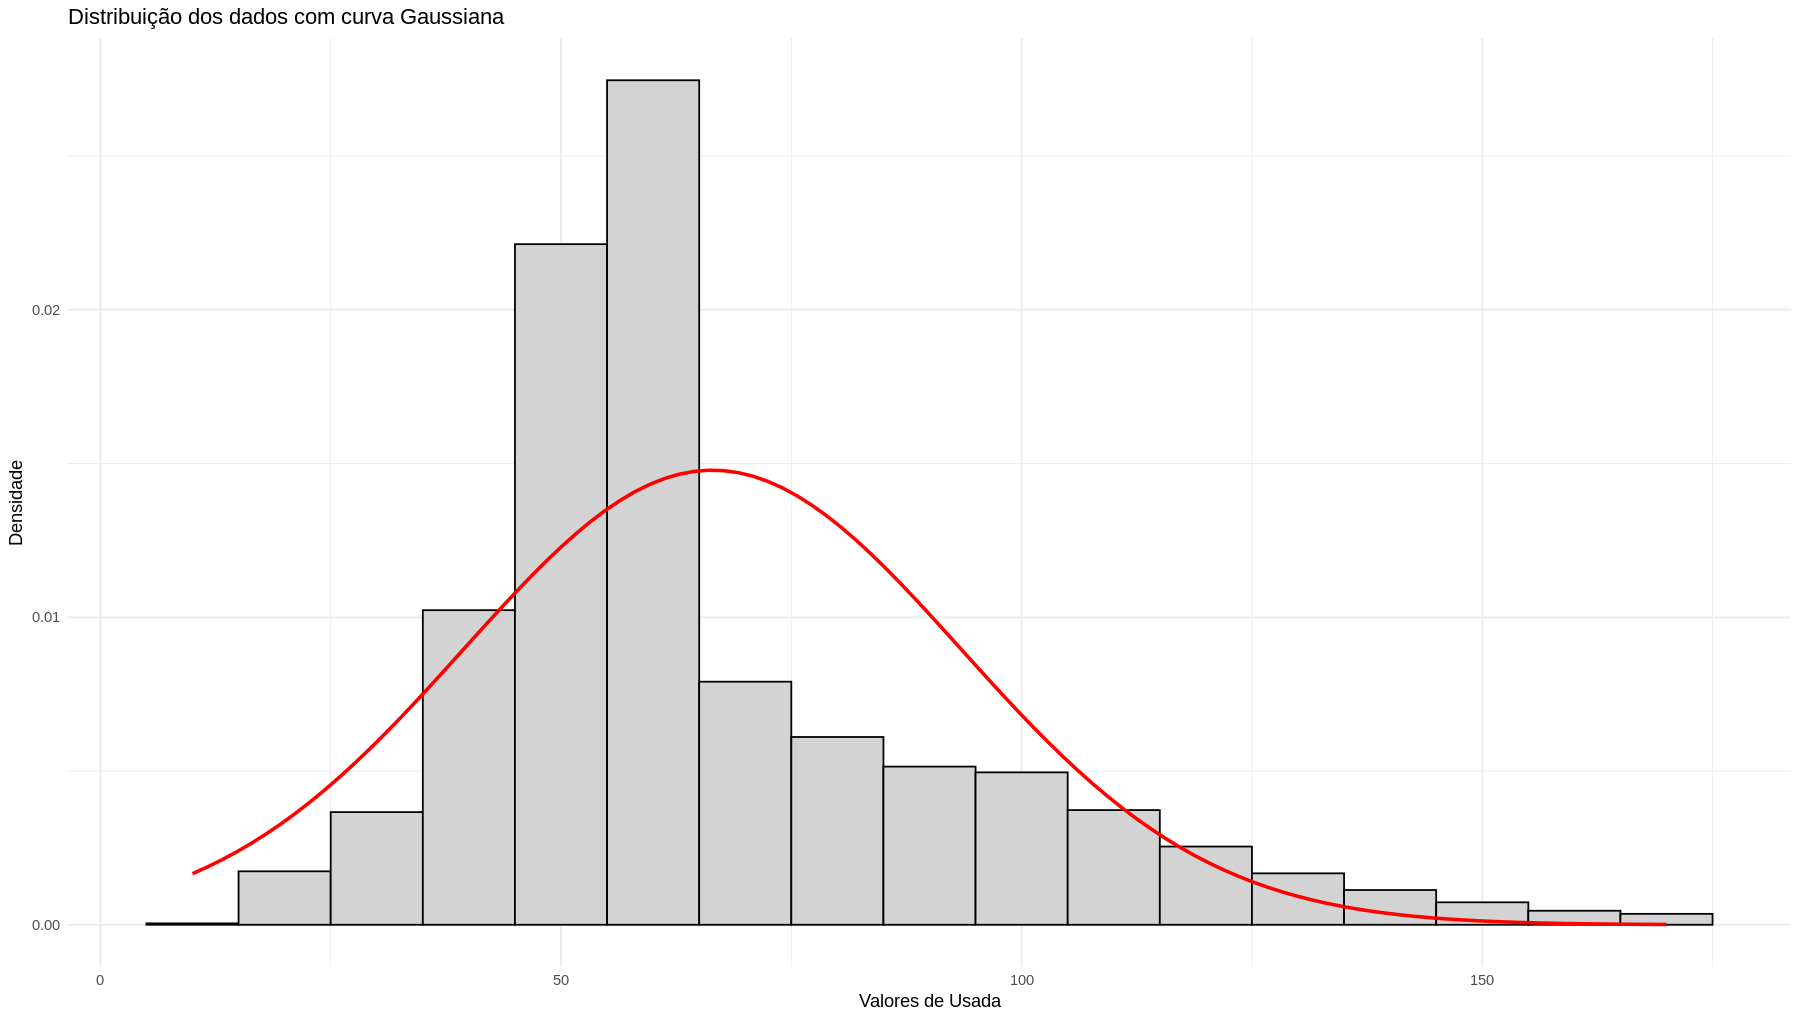

In [33]:
usadahist = ggplot(df, aes(x=Usada))
usadahist + geom_histogram(aes(y=..density..), binwidth=10, color="black", fill="lightgray") +
  stat_function(fun= dnorm, args=list(mean = mean(df$Usada, na.rm=T), sd= sd(df$Usada, na.rm=T)), color="red", size=1) +
  labs(title="Distribuição dos dados com curva Gaussiana", x="Valores de Usada", y="Densidade") +
  theme_minimal()

Criando o último gráfico, o modelo de regressão linear


Call:
lm(formula = Usada ~ Data, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.392 -17.528  -7.797  10.321 109.641 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.446e+03  8.125e+01  -17.80   <2e-16 ***
Data         8.961e-02  4.814e-03   18.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.75 on 19733 degrees of freedom
Multiple R-squared:  0.01726,	Adjusted R-squared:  0.01721 
F-statistic: 346.6 on 1 and 19733 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


[1] "Não existe nenhuma relação nos dados de consumo da coluna Usada em relação a coluna Data, os dias não estão interferindo basicamente no consumo de energia!"

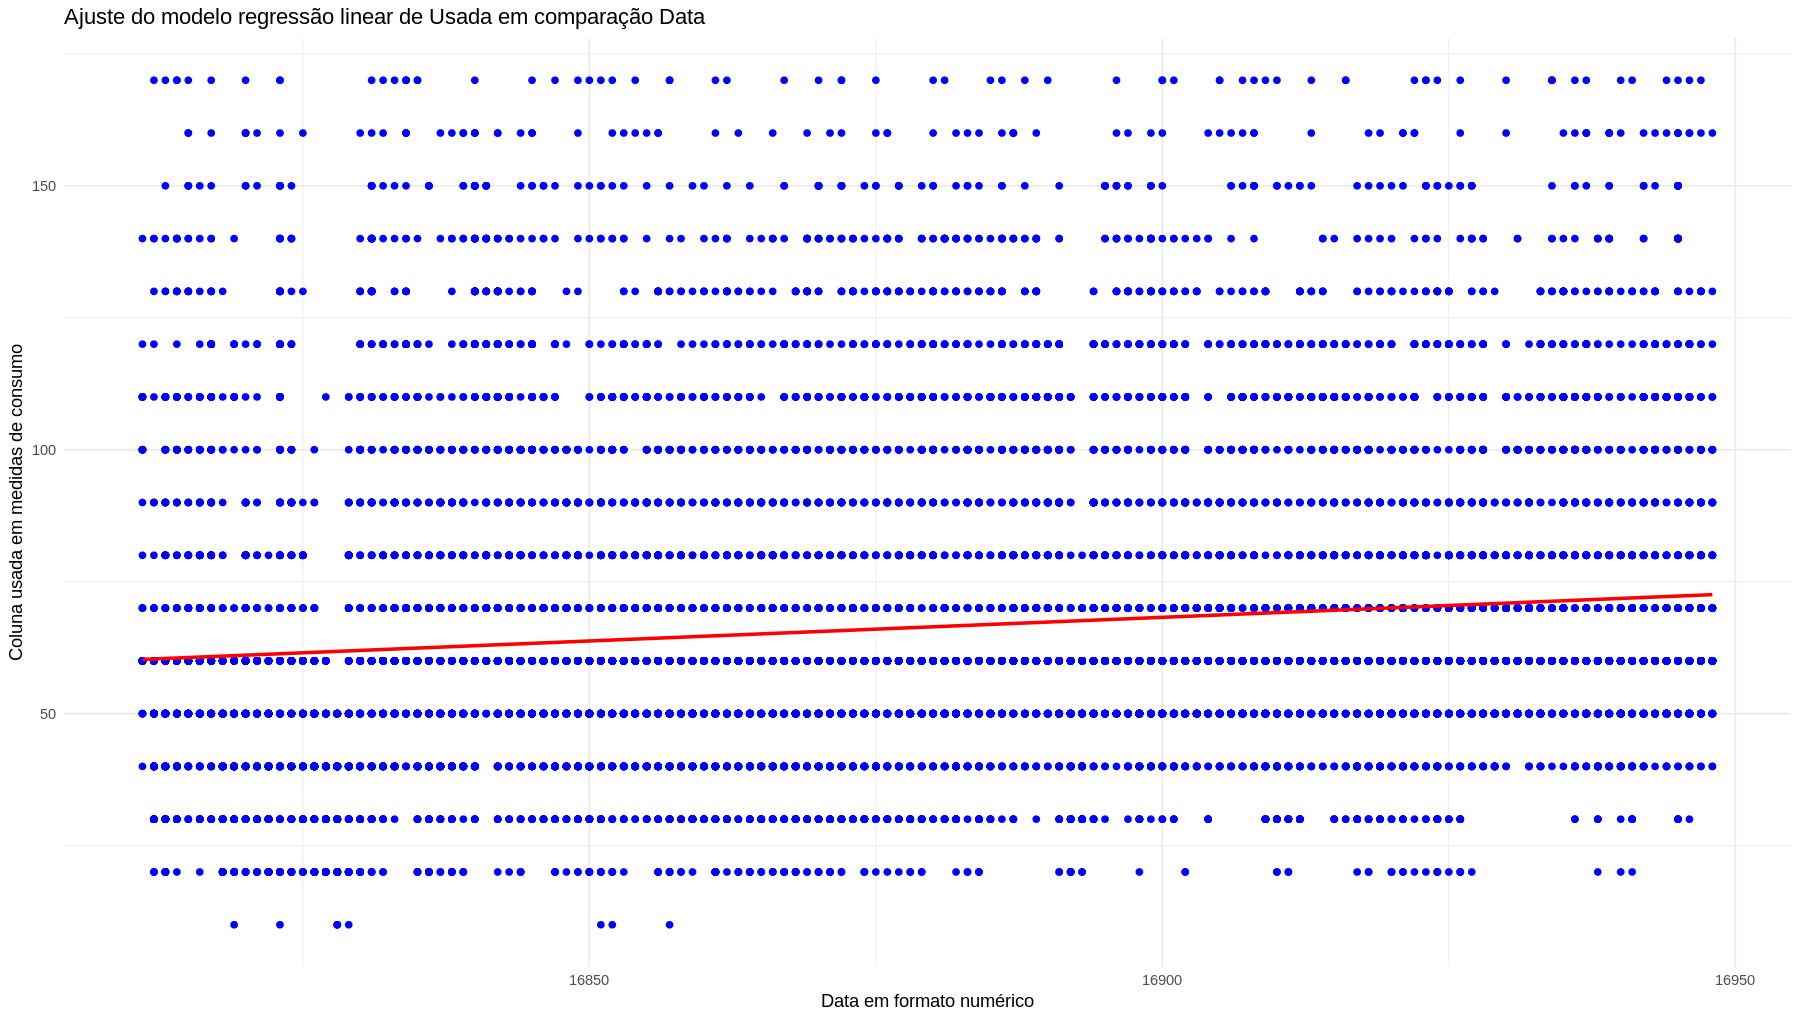

In [34]:
#Convertendo a coluna data em um formato numérico
df$Data = as.numeric(as.Date(df$Data, format="%Y-%m-%d"))

#Criando o modelo de regressão linear
modelo_usada = lm(Usada ~ Data, data=df)

#Visualizando o resumo do modelo
summary(modelo_usada)

#Plotando o gráfico de regressão linear
usada_regressao = ggplot(df, aes(x=Data, y=Usada))
usada_regressao + geom_point(color="blue") +
  geom_smooth(method="lm", color="red", se=F) +
  labs(title="Ajuste do modelo regressão linear de Usada em comparação Data", x="Data em formato numérico", y="Coluna usada em medidas de consumo") +
  theme_minimal()

"Não existe nenhuma relação nos dados de consumo da coluna Usada em relação a coluna Data, os dias não estão interferindo basicamente no consumo de energia!"

Normalizando os dados com mínimo e máximo

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2500  0.3125  0.3527  0.4375  1.0000 

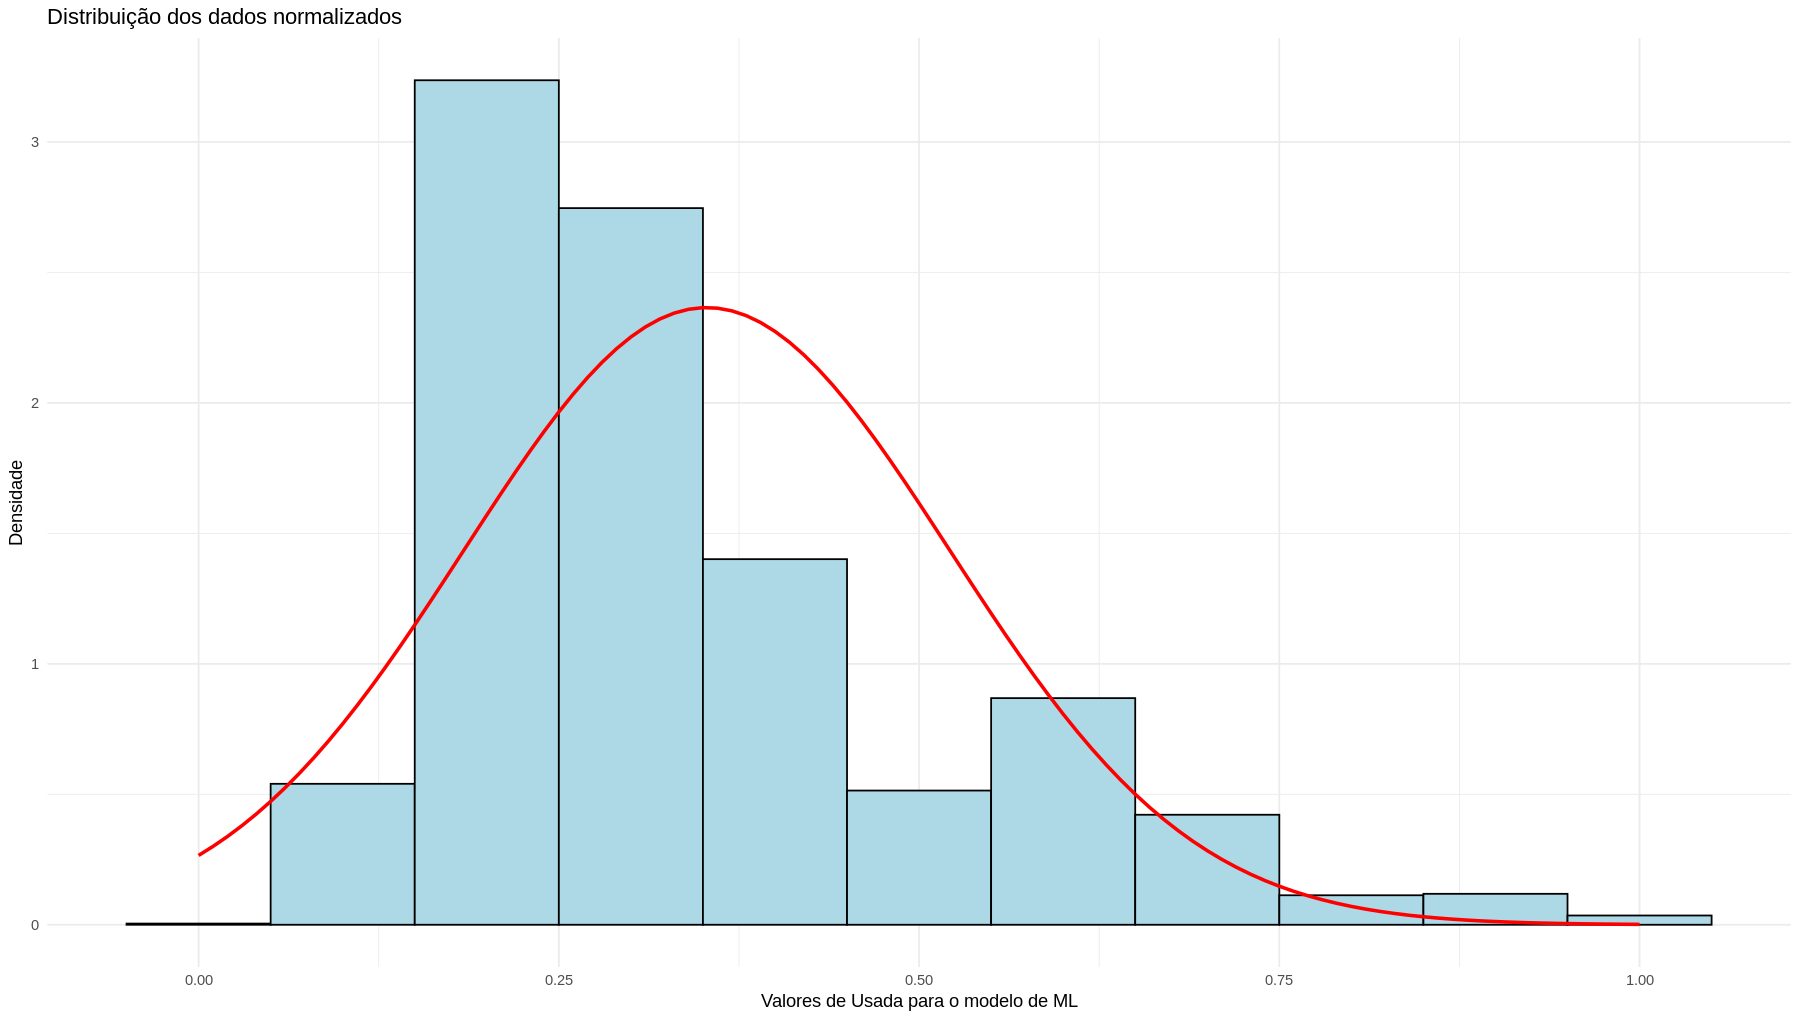

In [35]:
df$Usada = (df$Usada - min(df$Usada)) / (max(df$Usada - min(df$Usada)))

#Visualizando a distribuição dos dados
summary(df$Usada)

#Plotando um histograma para verificar a distribuição dos dados
histnormalizada = ggplot(df, aes(x=Usada)) +
  geom_histogram(aes(y=..density..), binwidth=0.1, bins=20, color="black", fill="lightblue") +
  stat_function(fun=dnorm, args=list(mean = mean(df$Usada, na.rm=T), sd = sd(df$Usada, na.rm=T)), color="red", size=1) +
  labs(title="Distribuição dos dados normalizados", x="Valores de Usada para o modelo de ML", y="Densidade") +
  theme_minimal()

histnormalizada

Teste de normalidade com Anderson Darling

In [ ]:
ad.test(df$Usada)

"Anderson-Darling normality test

data:  df$Usada
A = 854.96, p-value < 2.2e-16
"

#Observações sobre o código da coluna Usada

1. Os dados não seguem uma distribuição normal, mas não há nada que interfira no modelo de machine learning, levando em conta que os dados seguem uma leve assimetria a esquerda.
2. Os dados foram normalizados o máximo possível, mais tentativas de normalização podem distorcer os dados e posteriormente o modelo de machine learning.
3. Os dados devido a estarem concentrados em torno da média e mediana, eles obtiveram uma grande concentração em torno de 0.25 após a normalização com IQR e mínimo-máximo, mas isso não é algo que vá interferir ou prejudicar no desenvolvimento do modelo de machine learning.
4. Após alguns testes e conclusão do tratamento da coluna Usada, posso partir para a próxima coluna.
5. Fiz um teste com um modelo de regressão linear na coluna Usada ~ Data, mas não há relação direta alguma entre ambas as variáveis, o fator dos dias não necessariamente está influenciando o consumo de energia.
6. Os dados estão flutuando basicamente em torno da mediana dos valores e foram removidos picos de outliers, dessa forma, acredito que não há mais o que fazer na coluna Usada para tratamento dos dados, mesmo não seguindo uma distribuição normal com forte variação dos dados e a normalidade.
7. Encerro o relatório da coluna Usada aqui.

#Tratamento da coluna Luzes para o cálculo de Machine Learning

10    20    30    40    50    60    70 
 2212 16876   559    77     9     1     1

[1] " Min. 1st Qu.  Median    Mean 3rd Qu.    Max. \n  10.00   20.00   20.00   19.26   20.00   70.00 "

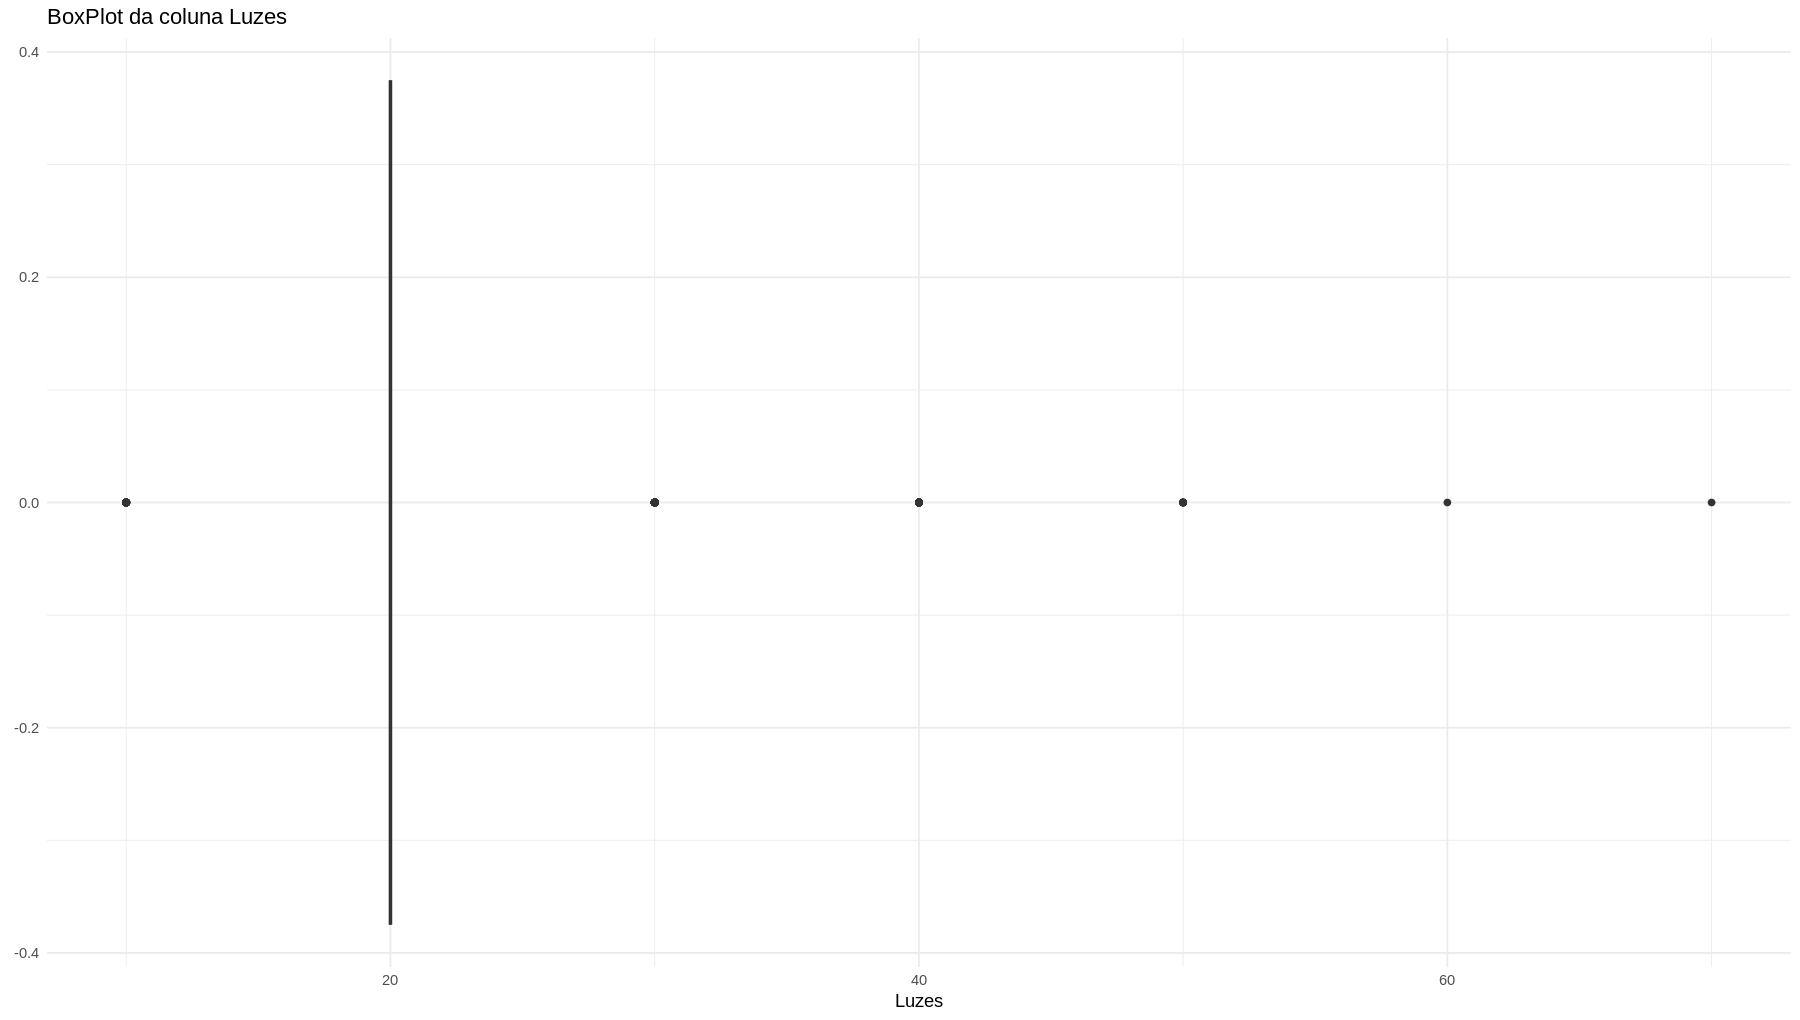

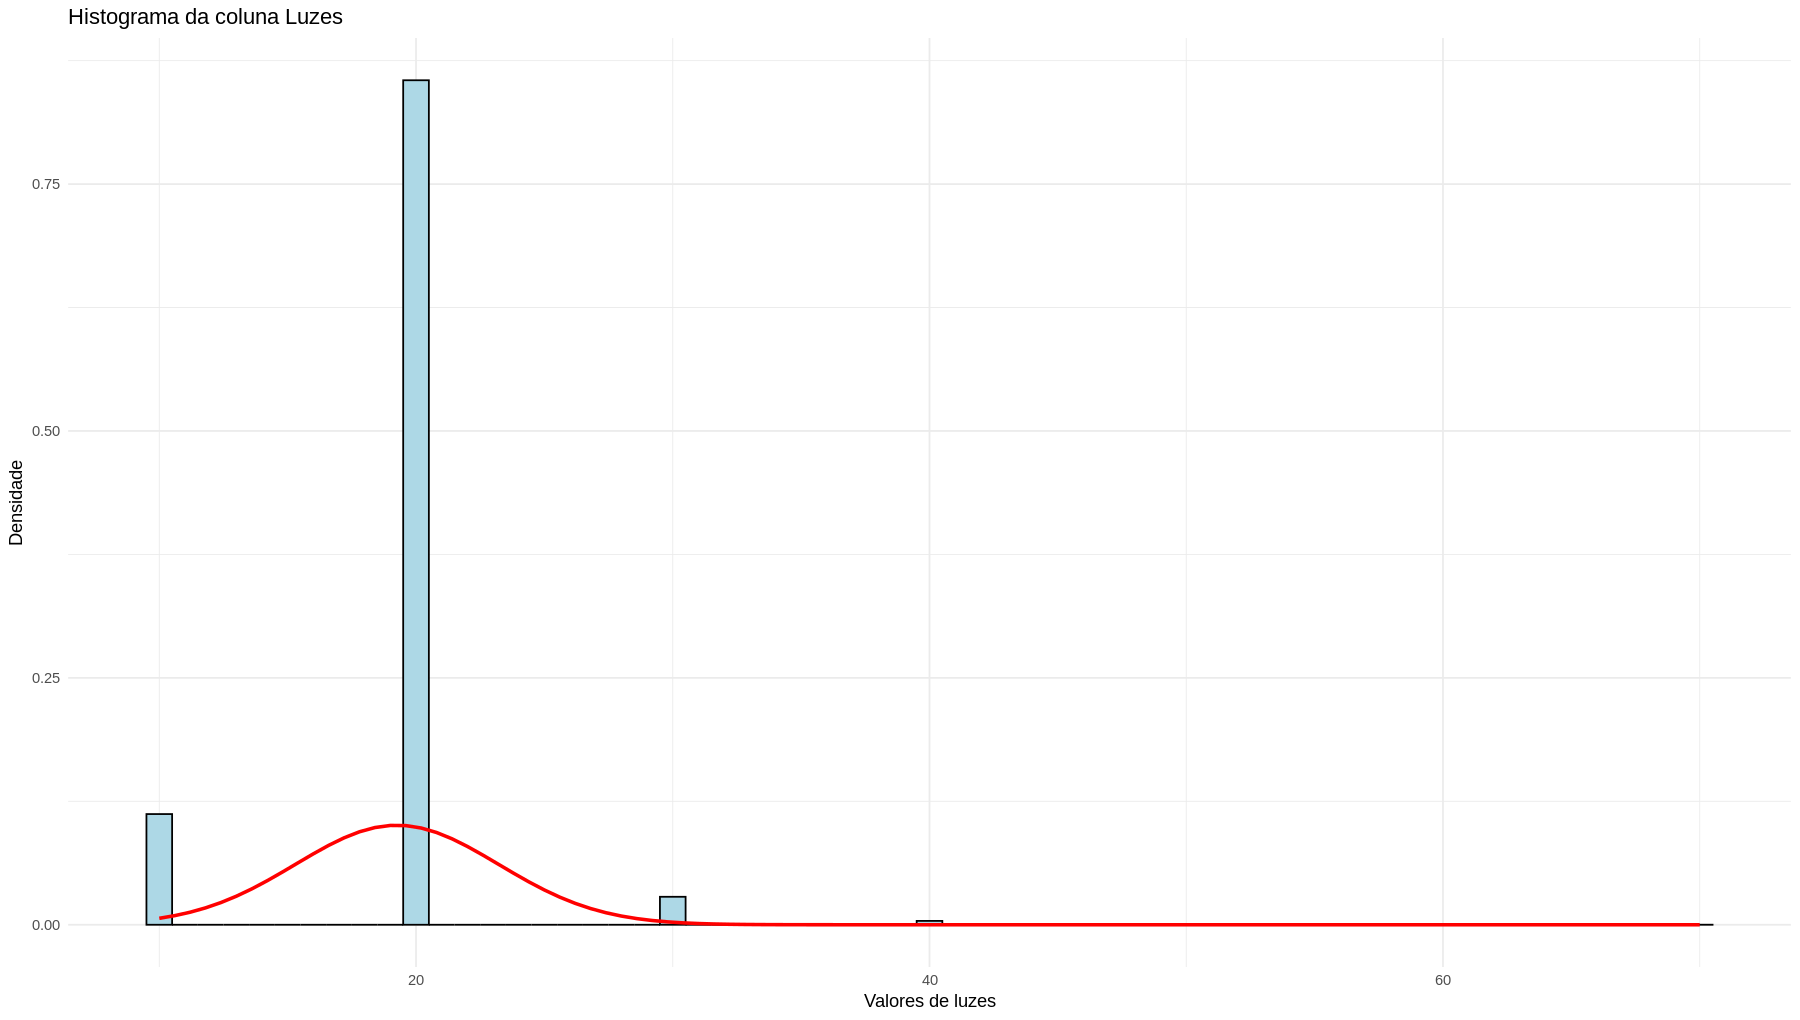

In [47]:
summary(as.factor(dados$Luzes))
" Min. 1st Qu.  Median    Mean 3rd Qu.    Max.
  10.00   20.00   20.00   19.26   20.00   70.00 "

#Plotando um gráfico boxplot da coluna Luzes
boxluzes = ggplot(dados, aes(y=Luzes)) + geom_boxplot() + coord_flip() + labs(title="BoxPlot da coluna Luzes") + theme_minimal()
boxluzes
#Após uma análise visual, pode ser interessante remover alguns picos de outliers devido ao tamanho padrão das residências, às vezes não terem 70 luzes

#Plotando um gráfico de histograma para entender a dispersão dos dados
histluzes = ggplot(dados, aes(x=Luzes)) +
  geom_histogram(aes(y=..density..), binwidth=1, bins=10, color="black", fill="lightblue") +
    stat_function(fun=dnorm, args=list(mean= mean(dados$Luzes, na.rm=T), sd= sd(dados$Luzes, na.rm=T)), color="red", size=1) +
    labs(title="Histograma da coluna Luzes", x="Valores de luzes", y="Densidade") + theme_minimal()
histluzes

"Estava notando que os gráficos ficaram muito estranhos, mas entendi agora o motivo:
10: 2212, 20: 16876, 30: 559, 40: 77, 50: 9, 60: 1, 70: 1
Os dados apresentam grande concentração em menores valores, porque como se trata de dados para predição de consumo de energia, normalmente as residências
não ultrapassam 20 luzes em um tamanho dentro do padrão no mercado, agora entendi, plotar esses gráficos não foram a melhor escolha, não havia
me atentado a diferença de luzes nos dados, agora, mas os gráficos não estão errados, são alguns picos de outliers que acontecem mesmo.
Essa coluna será uma coluna onde irei tratar mais com funções e comandos do que visualmente.
"

Normalizando os dados da coluna Luzes no data frame dados, o data frame original, continua...